La forma en que pensamos en listas es como secuencias de elementos, no como en vectores o matrices. Podemos aproximarnos a la idea de una matriz numérica utilizando listas dentro de listas, como muestra el siguiente ejemplo:

In [1]:
a = [[2,5,1],[3,10,12],[2,0,0]]
print(a[0][0])
print(a[1][2])

2
12


Es decir, esta lista se llama con dos índices i,j de forma tal que representa a la siguiente matriz:

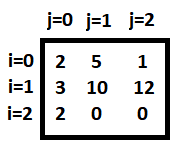

El problema con esto es que las funciones y métodos de Python no se comportan como esperaríamos si estas fuesen matrices. Por ejemplo, la operación suma no devuelve la suma elemento a elemento, sino la concatenación de la listas:

In [2]:
a = [[2,5,1],[3,10,12],[2,0,0]]
b = [[2,5,1],[3,10,12],[2,0,0]]
print(a+b)

[[2, 5, 1], [3, 10, 12], [2, 0, 0], [2, 5, 1], [3, 10, 12], [2, 0, 0]]


Podemos definir una función "a mano" para calcular la suma de dos matrices.

In [3]:
def suma_de_matrices(a,b):
  c = [] #a + b = c
  for i in range(len(a)):
    c.append([])
    for j in range(len(a[0])):
      c[i].append(a[i][j] + b[i][j])
  return c

Esto funciona, pero tiene muchos problemas.

  1 - Es lento y no es "escalable". Si n es la dimensión de la matriz, entonces la función hace $n^2$ operaciones. Con n=3 no hay problema, pero con $n = 10^6$ es otra historia.

  2 - Es código feo de leer y que me tomó algo de tiempo en escribir. 

  3 -  Ya existe una librería de Python que se ocupa de esto, y que es escalable porque hace las operaciones de forma vectorial (puede hacer varias operaciones de forma simultánea)

**En general, antes de definir funciones busquen si no hay librerías que ya tengan la solución implementada.**

**ejercicio: Calcular cuanto tiempo tarda en correr la función suma_de_matrices para $n=10^4$, comparar con Numpy.

La librería de Python llamada Numpy se inventó precisamente para poder transformar listas en vectores y listas de listas en matrices, de forma tal que cumplan con nuestras intuiciones de álgebra lineal.

In [4]:
import numpy as np
a = np.array([[2,5,1],[3,10,12],[2,0,0]])
b = np.array([[2,5,1],[3,10,12],[2,0,0]])
print(a+b)
print(type(a))


[[ 4 10  2]
 [ 6 20 24]
 [ 4  0  0]]
<class 'numpy.ndarray'>


Es importante notar que Numpy trabaja con datos numéricos y que por lo tanto podemos encontrar un error si intentamos operar aritméticamente con cualquier array.

In [5]:
a = np.array(['hola', 'mundo'])
b = np.array(['como', 'va'])
print(a+b)

UFuncTypeError: ignored

También es importante que las dimensiones sean consistentes con las operaciones que queremos realizar.

In [6]:
a = np.array([[2,5,1],[3,10,12],[2,0,0]])
b = np.array([[2,5,1],[3,10,12],[2,0,0],[10,10,10]])

# estas operaciones entre matrices son válidas
print(a+a)
print(a*a)

# estas operaciones son invalidas
print(a+b)
print(a*b)
print(b*a)

[[ 4 10  2]
 [ 6 20 24]
 [ 4  0  0]]
[[  4  25   1]
 [  9 100 144]
 [  4   0   0]]


ValueError: ignored

Notar que la operación de multiplicación actúa elemento a elemento. Por eso es imposible hacer el producto elemento a elemento de un array de $3 \times 3$ por uno de $4 \times 3$, no importa en que orden lo pongamos.

Para hacer producto interno de matrices, usamos dot:

In [7]:
print(np.dot(b,a))

[[ 21  60  62]
 [ 60 115 123]
 [  4  10   2]
 [ 70 150 130]]


Obviamente, el orden opuesto da error:


In [8]:
print(np.dot(a,b))

ValueError: ignored

¿Qué pasa con los arrays unidimensionales? ¿Entiende automáticamente Numpy que un array puede ser de $1 \times n$ o de $n \times 1$ dependiendo del producto que yo quiero hacer?

In [9]:
a = np.array([[2,5,1],[3,10,12],[2,0,0],[10,10,10]])
b = np.array([1,2,3])
c = np.array([1,2,3,4])
print(np.dot(a,b))
print(np.dot(c,a))

[15 59  2 60]
[54 65 65]


Aparentmente sí.
¿Cómo podemos obtener la dimensión de un array? Usamos el método array.shape()

In [10]:
print(a.shape)
print(b.shape)
print(c.shape)

(4, 3)
(3,)
(4,)


También podemos transponer con np.transpose()

In [11]:
print(a)
print(np.transpose(a))

[[ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]
 [10 10 10]]
[[ 2  3  2 10]
 [ 5 10  0 10]
 [ 1 12  0 10]]


Además, podemos concatenar matrices siempre que elijamos dimensiones consistenes para hacerlo. Para eso, primero formamos una tupla (...,...,...) y después usamos np.concatenate indicando el eje (0=filas, 1=columnas). Por ejemplo:

In [12]:
a = np.array([[2,5,1],[3,10,12],[2,0,0],[10,10,10]])
b = np.array([[2,5,1],[3,10,12],[2,0,0]])

print(np.concatenate((a,b),axis=0))
print(np.concatenate((b,b),axis=1))

[[ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]
 [10 10 10]
 [ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]]
[[ 2  5  1  2  5  1]
 [ 3 10 12  3 10 12]
 [ 2  0  0  2  0  0]]


Podemos elegir sub-matrices usando slicing de forma similar a cómo lo hicimos con listas:

In [15]:
print(a)
print('////////')
print(a[1:3,0:2])

[[ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]
 [10 10 10]]
////////
[[ 3 10]
 [ 2  0]]


Además, podemos seleccionar filas o columnas enteras usando : solo,

In [16]:
print(a[:,1])
print(a[1,:])

[ 5 10  0 10]
[ 3 10 12]


A veces es importante averiguar los índices de un array donde se cumple una determinada condición. Eso puede hacerse con la función np.where() de Numpy:

In [24]:
a = np.array([[2,5,1],[3,10,12],[2,0,0],[10,10,10]])
print(a)
np.where(a>1)

[[ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]
 [10 10 10]]


(array([0, 0, 1, 1, 1, 2, 3, 3, 3]), array([0, 1, 0, 1, 2, 0, 0, 1, 2]))

Esto podemos usarlo directamente para indexar el array y extraer los valores que cumplen con la condición pedida:

In [23]:
a[np.where(a>1)]

array([ 2,  5,  3, 10, 12,  2, 10, 10, 10])

Otra forma de hacerlo es con indexado booleano:

In [20]:
a[a>1]

array([ 2,  5,  3, 10, 12,  2, 10, 10, 10])

Si tenemos varias condiciones podemos usar operadores lógicos:

In [21]:
a[a>1 and a<9]

ValueError: ignored

No es tan sencillo como parecia. Cuando tenemos arrays con más de un elemento, tenemos que usar las funciones np.logical_and() y np.logical_or():

In [25]:
print(a>1)

print('//////////////////////////')

print(a<9)

print('//////////////////////////')

print(np.logical_and(a>1,a<9))

print('//////////////////////////')

print(np.logical_or(a>1,a<9))

print('//////////////////////////')

print(a[np.logical_and(a>1,a<9)])

[[ True  True False]
 [ True  True  True]
 [ True False False]
 [ True  True  True]]
//////////////////////////
[[ True  True  True]
 [ True False False]
 [ True  True  True]
 [False False False]]
//////////////////////////
[[ True  True False]
 [ True False False]
 [ True False False]
 [False False False]]
//////////////////////////
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
//////////////////////////
[2 5 3 2]


Hay algunos arrays predefinidos útiles que Numpy puede generar por nosotros, por ejemplo, arrays llenos de 0's o 1's con una forma determinada, o la matriz identidad. Notar que las dimensiones se le pasan como una tupla (...,...,...):

In [26]:
print(np.zeros((2,5)))
print(np.ones((2,5)))
print(np.eye(7))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


Por último, si tenemos un archivo de datos del tipo .csv (comma separated values) podemos leerlo fácilmente con Numpy.

Para eso, compartí el archivo 'ejemplo_csv_clase_2.csv' en el folder de Labo de Datos. Procedemos a montar el drive y cargar el archivo .csv como una matrix:

In [29]:
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/My Drive/LaboDatos2022/ejemplo_csv_clase_2.txt' 

from numpy import genfromtxt
a = genfromtxt(filename, delimiter=',')

print(a)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[  1.     2.23    nan]
 [  3.      nan 123.  ]
 [  0.     0.     0.  ]]


Notamos que las entradas que tenían strings fueron cargadas como nan = "not a number"

La forma en que vamos a cargar datasets consistentes de datos heterogéneos en Python es mediante Pandas, una librería para análisis de datos en Python, en particular usando dataframes.  